In [3]:
# load necessary libraries
library(DBI)
library(corrgram)
library(caret)
library(gridExtra)
library(ggpubr)
library(reshape2)

## Turn Off warnings
options( warn = -1 )

# process in parallel on Windows
#library(doParallel) 
#cl <- makeCluster(detectCores(), type='PSOCK')
#registerDoParallel(cl)

# For MAC OSX and Unix like System
library(doMC)
registerDoMC(cores = 4)

Loading required package: lattice

Attaching package: ‘lattice’

The following object is masked from ‘package:corrgram’:

    panel.fill

Loading required package: ggplot2
Loading required package: magrittr
Loading required package: foreach
Loading required package: iterators
Loading required package: parallel


In [4]:
# Load the DataSets: Titanic training Data
dataSet <- read.csv("international-airline-passengers.csv", header = TRUE, sep = ',')
colnames(dataSet)

[1] "Month"     "Passenger"

Month,Passenger
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136
1949-10,119


,Month,Passenger
135,1960-03,419
136,1960-04,461
137,1960-05,472
138,1960-06,535
139,1960-07,622
140,1960-08,606
141,1960-09,508
142,1960-10,461
143,1960-11,390
144,1960-12,432


[1] 144   2


 factor integer 
      1       1 

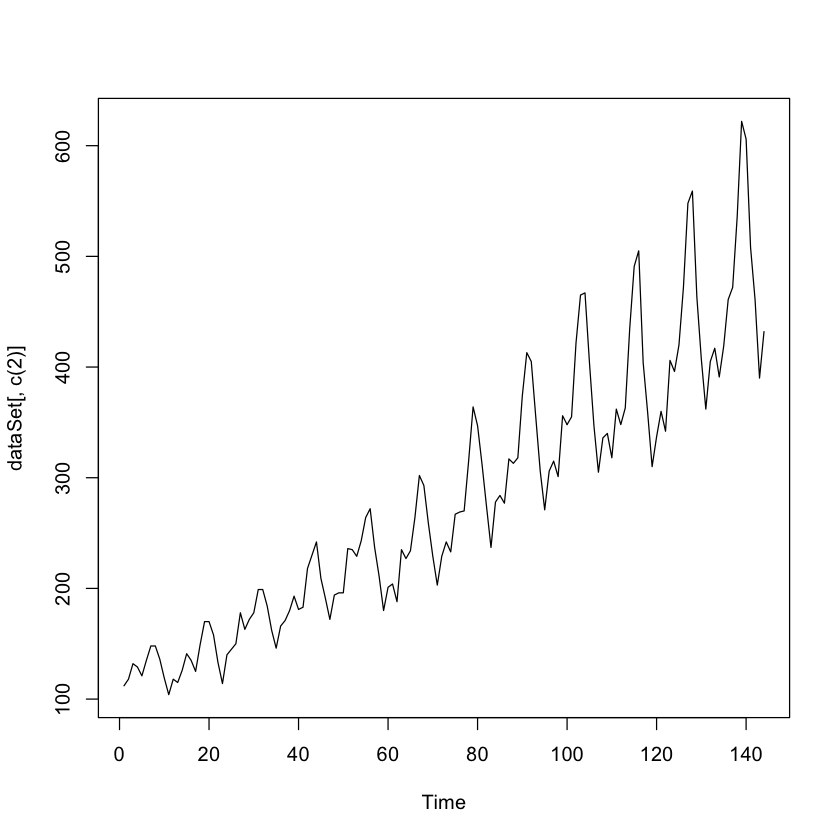

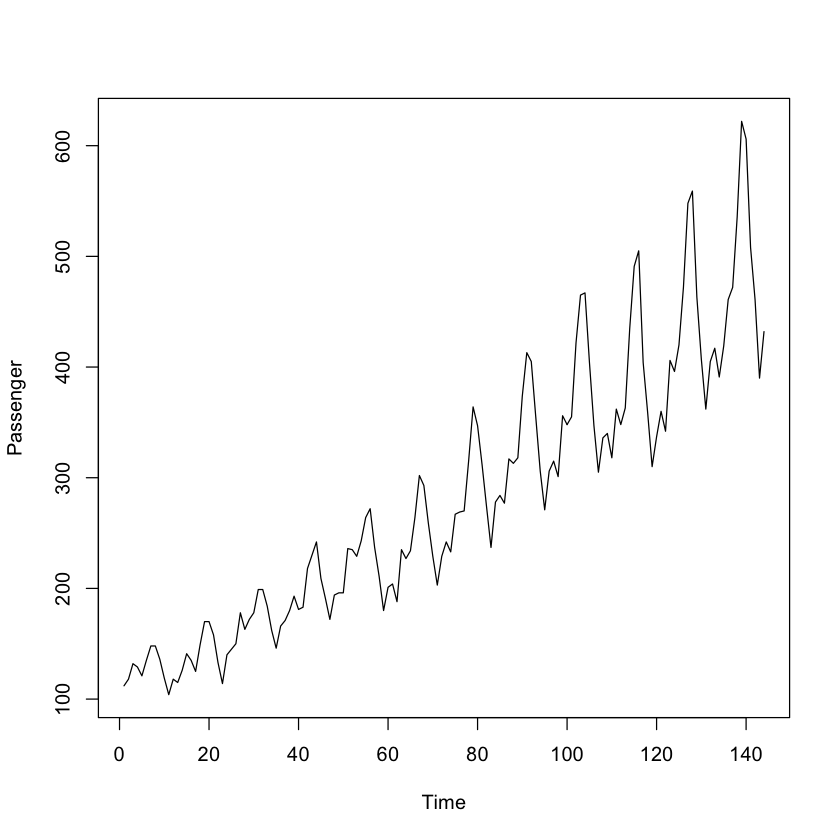

In [5]:
# Print top 10 rows in the dataSet
head(dataSet, 10)
# Print last 10 rows in the dataSet
tail(dataSet, 10)
# Dimention of Dataset
dim(dataSet)
# Check Data types of each column
table(unlist(lapply(dataSet, class)))

plot.ts(dataSet[, c(2)])
plot.ts(dataSet["Passenger"])

In [6]:
# Covert the dataset to a vactor i.e. creating "y" variable
dataSet  <- as.numeric(dataSet[, c("Passenger")])

# Create "x" variable as row numbers / names
names(dataSet) <- 1:length(dataSet)

df <- cbind(read.table(text = names(dataSet)), dataSet)
x = df$V1; y = df$dataSet

In [7]:
# Define the Polynomial model: y ~ poly(x,6, raw = TRUE)
Model = lm(y  ~ poly(x,6, raw = TRUE))

# Summarise the fitted model 
summary(Model)


Call:
lm(formula = y ~ poly(x, 6, raw = TRUE))

Residuals:
     Min       1Q   Median       3Q      Max 
-102.097  -26.479   -6.811   20.968  148.092 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.206e+02  2.892e+01   4.173 5.32e-05 ***
poly(x, 6, raw = TRUE)1  3.011e-01  5.428e+00   0.055    0.956    
poly(x, 6, raw = TRUE)2  8.127e-02  3.220e-01   0.252    0.801    
poly(x, 6, raw = TRUE)3 -2.006e-03  8.286e-03  -0.242    0.809    
poly(x, 6, raw = TRUE)4  2.722e-05  1.036e-04   0.263    0.793    
poly(x, 6, raw = TRUE)5 -1.757e-07  6.198e-07  -0.284    0.777    
poly(x, 6, raw = TRUE)6  4.277e-10  1.420e-09   0.301    0.764    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45.5 on 137 degrees of freedom
Multiple R-squared:  0.8622,	Adjusted R-squared:  0.8562 
F-statistic: 142.9 on 6 and 137 DF,  p-value: < 2.2e-16


In [8]:
# Summarise the r_squared for actual and fitted data 
summary(Model)$r.squared; r2 <- cor(fitted(Model), y)^2; print(r2)

[1] 0.8621914

[1] 0.8621914


In [9]:
# Generate the trendline and fitted values
tendency = coef(Model)[[7]] * x^6 + coef(Model)[[6]] * x^5 + coef(Model)[[5]] * x^4 + coef(Model)[[4]] * x^3 + coef(Model)[[3]] * x^2 + coef(Model)[[2]] * x + coef(Model)[[1]]
print(tendency)

  [1] 121.0290 121.5603 122.2313 123.0318 123.9516 124.9817 126.1131 127.3377
  [9] 128.6478 130.0362 131.4961 133.0212 134.6058 136.2443 137.9318 139.6636
 [17] 141.4356 143.2437 145.0845 146.9547 148.8514 150.7720 152.7140 154.6755
 [25] 156.6545 158.6494 160.6590 162.6820 164.7174 166.7644 168.8225 170.8911
 [33] 172.9699 175.0588 177.1577 179.2666 181.3858 183.5155 185.6560 187.8078
 [41] 189.9712 192.1470 194.3355 196.5376 198.7538 200.9847 203.2312 205.4939
 [49] 207.7735 210.0707 212.3862 214.7207 217.0749 219.4493 221.8445 224.2612
 [57] 226.6998 229.1608 231.6447 234.1517 236.6823 239.2367 241.8151 244.4176
 [65] 247.0443 249.6952 252.3703 255.0694 257.7923 260.5388 263.3086 266.1011
 [73] 268.9161 271.7529 274.6110 277.4896 280.3881 283.3057 286.2414 289.1945
 [81] 292.1640 295.1489 298.1481 301.1606 304.1852 307.2208 310.2662 313.3202
 [89] 316.3816 319.4492 322.5217 325.5980 328.6768 331.7568 334.8370 337.9162
 [97] 340.9933 344.0672 347.1370 350.2016 353.2603 356.3122 359.

In [10]:
# Generate the forecast in the future time horizon
steps = 25
x_in_Future <- (length(x)+1) : (length(x)+steps)

forecastedValues = coef(Model)[[7]] * x_in_Future^6 + coef(Model)[[6]] * x_in_Future^5 + coef(Model)[[5]] * x_in_Future^4 + coef(Model)[[4]] * x_in_Future^3 + coef(Model)[[3]] * x_in_Future^2 + coef(Model)[[2]] * x_in_Future + coef(Model)[[1]]
print(forecastedValues)

 [1] 502.3889 507.8902 513.6522 519.6935 526.0338 532.6937 539.6946 547.0591
 [9] 554.8104 562.9730 571.5723 580.6350 590.1885 600.2616 610.8840 622.0869
[17] 633.9024 646.3640 659.5062 673.3652 687.9780 703.3833 719.6211 736.7328
[25] 754.7610


In [11]:
# Plotting Observed versus Predicted
res <- stack(data.frame(Observed = c(y,forecastedValues), 
                        Predicted = c(tendency, forecastedValues)))
res <- cbind(res, x = rep(c(x,x_in_Future) , 2))

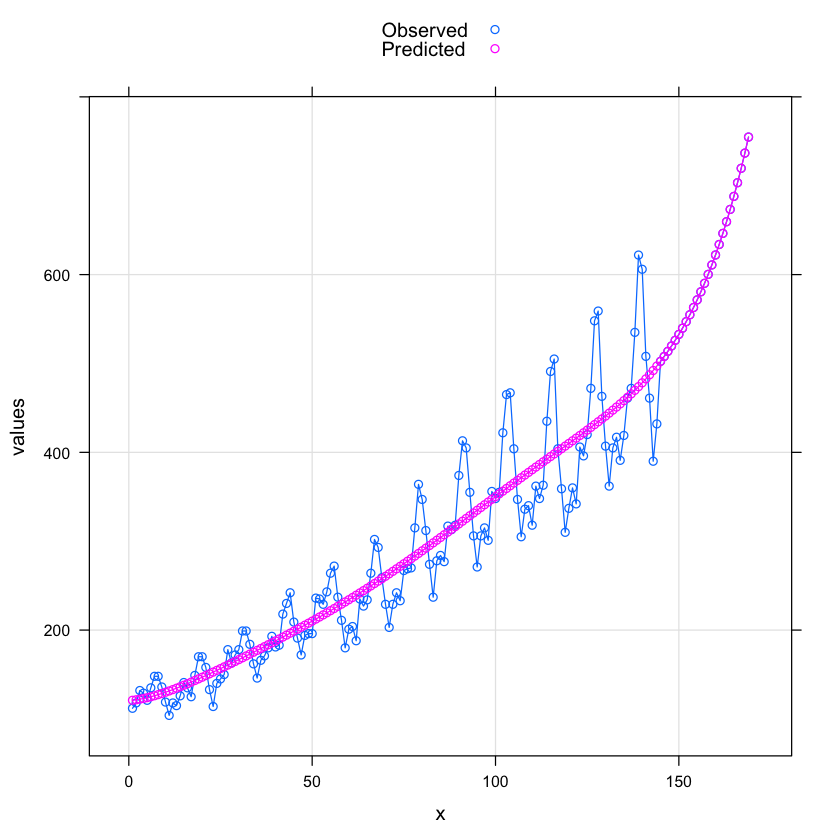

In [12]:
require("lattice")
g1 <- xyplot(values ~ x, data = res, group = ind, auto.key = TRUE, grid = TRUE,
             type=c("p","l"))

library(gridExtra)
grid.arrange(g1, nrow = 1)